# **Лабораторная работа №2. Библиотека NumPy**
**Цель:** Получить представление о библиотеке NumPy. Научиться работать с многомерными массивами, в том числе и без явного использования циклов.

**Numeric Python (NumPy)**- это несколько модулей для вычислений с многомерными массивами, необходимых для многих численных приложений.

**Массив**- это набор однородных элементов, доступных по индексам.

Количество размерностей и длина массива по каждой оси называются **формой массива (shape).**

В **Python массивы** – это объекты, содержащие буфер данных и информацию о форме, размерности, типе данных и т.д.

**Базовые типы**: int, unsigned int, float, complex



### Зачем нужна библиотека NumPy

***Мы могли писать такой код и ни о чем не задумываться.***

In [1]:
%%time
arr = []
n = 10**7
for i in range(n):
    arr.append(i*5)

CPU times: user 1.59 s, sys: 215 ms, total: 1.8 s
Wall time: 1.86 s


***Или такой...***

In [2]:
%%time
def summ(a):
    ans = 0
    for i in a:
        ans += i
    return ans

arr = range(10**7)

print(summ(arr))

49999995000000
CPU times: user 1.03 s, sys: 21 ms, total: 1.05 s
Wall time: 1.11 s


Списки и обычные циклы решают задачи, но производительность оставляет желать лучшего.

Решение проблемы на современных системах - параллелизм или, как минимум, векторизация вычислений. Эти принципы реализованы в библиотеке NumPy.

In [3]:
import numpy as np

In [4]:
%%time

sum_value = np.sum(np.arange(10**7), dtype=np.int64)
print(sum_value)

49999995000000
CPU times: user 14 ms, sys: 22.5 ms, total: 36.5 ms
Wall time: 41.4 ms


In [5]:
%%time
arr = 5*np.arange(10**7)

CPU times: user 20.6 ms, sys: 17.7 ms, total: 38.3 ms
Wall time: 46.4 ms


# Создание массива
Три вида массивов:


*   произвольные многомерные массивы (array)
*   матрицы (matrix) – двухмерные квадратные массивы, для которых дополнительно определены операции возведения в степень и перемножения (“numpy.matrix”)
*   сетки (grid) – массивы, в которых записаны значения координат точек сети (обычно ортогональной). Сетки позволяют удобно вычислять значение функций многих переменных.






In [6]:
import numpy as np

In [7]:
#создание одномерных массивов
print(np.array([4,3,2]))
print(np.ones(5))
print(np.zeros(5))
print(np.random.random(5))

[4 3 2]
[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[0.03333169 0.15289016 0.76245127 0.03591699 0.38278488]


In [8]:
#создание многомерных массивов
print(np.array([[4,3,2],[4,2,1]]))
print(np.ones((5,3)))
print(np.zeros((5,3)))
print(np.random.random((5,3)))

[[4 3 2]
 [4 2 1]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.42642863 0.75315344 0.81252275]
 [0.61898393 0.51577065 0.88486078]
 [0.24937114 0.95472534 0.79740145]
 [0.68316284 0.4614453  0.06044484]
 [0.52940104 0.10353791 0.85173458]]


In [9]:
print(np.array([[[4,3,2],[4,2,1]],[[4,3,2],[4,2,1]]]))
print(np.ones((2,5,3)))
print(np.zeros((2,5,3)))

[[[4 3 2]
  [4 2 1]]

 [[4 3 2]
  [4 2 1]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### Старый (legacy) способ псевдослучайной генерации

In [10]:
#случайные значения
np.random.seed(50)
print(np.random.random((2,5,3)))
print(np.random.randint(0, 3, 10))
print(np.random.randint(0, 3, (2, 10)))

[[[0.49460165 0.2280831  0.25547392]
  [0.39632991 0.3773151  0.99657423]
  [0.4081972  0.77189399 0.76053669]
  [0.31000935 0.3465412  0.35176482]
  [0.14546686 0.97266468 0.90917844]]

 [[0.5599571  0.31359075 0.88820004]
  [0.67457307 0.39108745 0.50718412]
  [0.5241035  0.92800093 0.57137307]
  [0.66833757 0.05225869 0.3270573 ]
  [0.05640164 0.17982769 0.92593317]]]
[0 2 2 0 0 2 2 1 0 0]
[[0 2 0 1 2 1 1 1 1 1]
 [0 1 0 1 1 0 2 1 0 0]]


### Новый способ псевдослучайной генерации

In [11]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

In [12]:
rs1 = RandomState(50)
print(rs1.random((2,5,3)))

[[[0.49460165 0.2280831  0.25547392]
  [0.39632991 0.3773151  0.99657423]
  [0.4081972  0.77189399 0.76053669]
  [0.31000935 0.3465412  0.35176482]
  [0.14546686 0.97266468 0.90917844]]

 [[0.5599571  0.31359075 0.88820004]
  [0.67457307 0.39108745 0.50718412]
  [0.5241035  0.92800093 0.57137307]
  [0.66833757 0.05225869 0.3270573 ]
  [0.05640164 0.17982769 0.92593317]]]


In [13]:
rs2 = RandomState(MT19937(SeedSequence(50)))

print(rs2.random((2,5,3)))

[[[0.02522775 0.78366844 0.42097213]
  [0.65562599 0.20877258 0.87306482]
  [0.69193498 0.12913225 0.74216395]
  [0.82046464 0.52203198 0.48355741]
  [0.31310619 0.46238135 0.55649483]]

 [[0.17176876 0.87580536 0.3716153 ]
  [0.21394909 0.69375585 0.19427957]
  [0.52370812 0.1269939  0.51401635]
  [0.88618441 0.83816894 0.79707618]
  [0.44595248 0.15041308 0.8400823 ]]]


In [14]:
#создание двумерного массива
a=np.array([[1, 2], [3, 4]])
print(a)
print(type(a))
b=np.asmatrix([[1, 2], [3, 4]])
print(b)
print(type(b))

[[1 2]
 [3 4]]
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
<class 'numpy.matrix'>


In [15]:
#создание сеток
c=np.arange(3.0)
print(c)
print(np.arange(10, 30, 5))
print(np.arange(0, 1, 0.1))
d=np.linspace(2.0, 3.0, num=9)
print(d)

[0. 1. 2.]
[10 15 20 25]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[2.    2.125 2.25  2.375 2.5   2.625 2.75  2.875 3.   ]


In [16]:
#создание массивов определенного вида
e=np.empty([2, 2], dtype=int)
print(e)
f=np.identity(3)
print(f)
print(np.diag(f))
print(np.shape(f))

[[10 15]
 [20 25]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1. 1. 1.]
(3, 3)


In [17]:
b = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=complex)
print(b)

[[1.5+0.j 2. +0.j 3. +0.j]
 [4. +0.j 5. +0.j 6. +0.j]]


In [18]:
#взять размер уже сущетсвующего массива
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.zeros_like(A)
print(B)
C = np.ones_like(A)
print(C)

[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]


# Арифметические операции
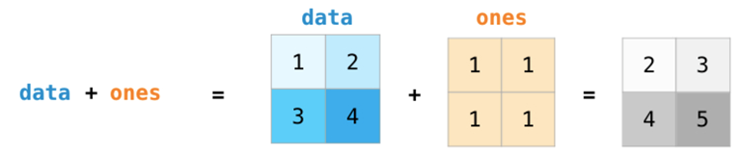
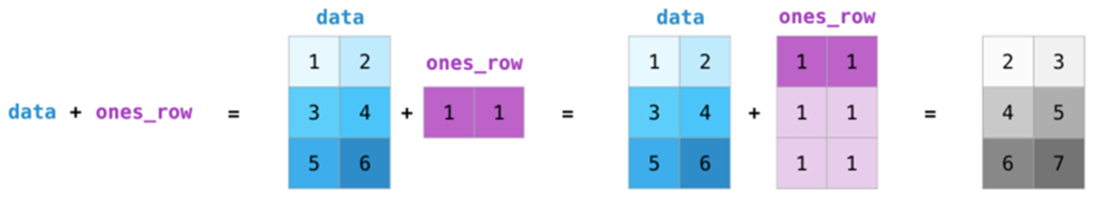

In [19]:
#одномерные массивы
a = np.array([2,4,3,7])
b = np.array([5,3,2,1])
print(a+b)
print(a+1)
print(a**3)
print(a<4)

[7 7 5 8]
[3 5 4 8]
[  8  64  27 343]
[ True False  True False]


In [20]:
#двумерные массивы
data=np.array([[1,2],[3,4]])
ones=np.ones((2,2))
print(data+ones)
print(data+2)
ones_row=np.ones(2)
print(data+ones_row)

[[2. 3.]
 [4. 5.]]
[[3 4]
 [5 6]]
[[2. 3.]
 [4. 5.]]


# Сложные функции
Тригонометрические, экспоненты, логарифмы, преобразования между градусами и радианами, модуль, корень квадратный


In [21]:
A = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
B = np.exp(A)
C = np.log(B)

print('A', A, '\n')
print('B', B, '\n')
print('C', C, '\n')

A [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 

B [[2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [5.45981500e+01 1.48413159e+02 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 8.10308393e+03]] 

C [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 



# Индекс. Срезы
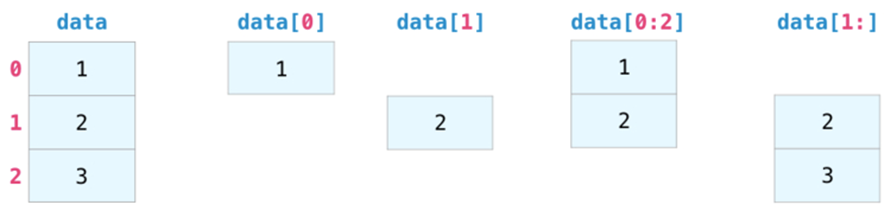
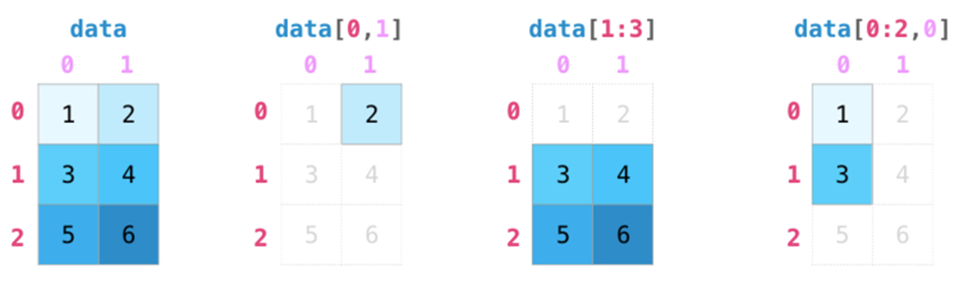

In [22]:
a = np.arange(10) ** 3
print(a)
print(a[1])
a[3:7]=8
print(a)
print(a[::-1])

[  0   1   8  27  64 125 216 343 512 729]
1
[  0   1   8   8   8   8   8 343 512 729]
[729 512 343   8   8   8   8   8   1   0]


In [23]:
b = np.array([[  0, 1, 2, 3],
...           [10, 11, 12, 13],
...           [20, 21, 22, 23],
...           [30, 31, 32, 33],
...           [40, 41, 42, 43]])
print(b[:,2])
print(b[:2])
print(b[1:3, : : ])
print(b[-1])
print(b[:,-1])


[ 2 12 22 32 42]
[[ 0  1  2  3]
 [10 11 12 13]]
[[10 11 12 13]
 [20 21 22 23]]
[40 41 42 43]
[ 3 13 23 33 43]


# Агрегирование


In [24]:
#одномерный массив
data=np.random.randint(1,25,5)
print(data)
print(data.max())
print(data.min())
print(data.sum())
print(data.mean())
print(data.prod())
print(data.std())
print(data.argmax())
print(data.argmin())

[ 5 13 22 15  5]
22
5
60
12.0
107250
6.44980619863884
2
0


In [25]:
#многомерный массив
data=np.random.randint(1,25,(5,3))
print(data)
print(data.max())
print(data.max(axis=0))
print(data.max(axis=1))
print(data.min())
print(data.sum())
print(data.sum(axis=0))
print(data.sum(axis=1))
print(data.mean())
print(data.prod())
print(data.std())
print(data.argmax())
print(data.argmin())

[[23 12 20]
 [ 1  6  9]
 [13 12  4]
 [ 7 19  9]
 [16  6 21]]
23
[23 19 21]
[23  9 13 19 21]
1
178
[60 55 63]
[55 16 29 35 43]
11.866666666666667
448850905251840
6.489649879273578
0
3


In [26]:
n=5
y=np.random.random(n)
print(y)
y_=np.random.random(n)
print(y_)
error = (1/n)*np.sum(np.square(y_-y))
print(error)

[0.58379231 0.52666409 0.92226269 0.91925702 0.25200886]
[0.68263261 0.96427612 0.22696165 0.7160172  0.79776011]
0.20477361453556786


# Изменение формы массива
**reshape** - можно легко и быстро менять форму массива, не изменяя самих данных.

In [27]:
A = np.arange(24)
B = A.reshape(4, 6)
C = A.reshape(4, 3, 2)
print('B\n', B)
print('\nC\n', C)
#размерность, размер по каждой оси, общий размер
print(C.ndim, C.shape, len(C.shape), A.size)
#размер вдоль оси вычисляется автоматически
D= A.reshape(4, -1)
print('\nD\n', D)

B
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

C
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]
3 (4, 3, 2) 3 24

D
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


# Операции над матрицами

In [28]:
#единичная матрица
b = np.eye(5)
print ("Единичная матрица:\n", b)

Единичная матрица:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [29]:
#транспонирование матрицы
a=np.random.randint(1,10,(3,3))
print(a)
a_t=a.T
print("Транспонирование")
print(a_t)

[[6 9 4]
 [4 6 4]
 [7 9 7]]
Транспонирование
[[6 4 7]
 [9 6 9]
 [4 4 7]]


In [30]:
#скалярное произведение
a=np.random.randint(1,10,(3,5))
print(a)
b=np.random.randint(1,10,(5,3))
print(b)
#print(a * b)
print(a.dot(b))

[[1 9 3 2 2]
 [7 6 6 7 5]
 [5 1 1 8 2]]
[[1 5 5]
 [2 6 7]
 [4 9 3]
 [9 7 7]
 [1 5 5]]
[[ 51 110 101]
 [111 199 169]
 [ 85 106 101]]


In [31]:
#транспонирование
data=np.random.randint(1,10,15)
print(data)
print(data.reshape(3,5))
print(data.reshape(5,3))

[8 1 7 5 4 1 2 4 5 9 5 6 7 8 6]
[[8 1 7 5 4]
 [1 2 4 5 9]
 [5 6 7 8 6]]
[[8 1 7]
 [5 4 1]
 [2 4 5]
 [9 5 6]
 [7 8 6]]


In [32]:
#определитель матрицы
a = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(a)
print ("Матрица:\n", a)
print ("Определитель:\n", det)

#ранг матрицы
r = np.linalg.matrix_rank(a)
print ("Ранг матрицы:", r)

#обратная матрица
b = np.linalg.inv(a)
print ("Обратная матрица к A:\n", b)
print ("Произведение A на обратную должна быть единичной:\n", a.dot(b))

#собственные числа и вектора
w, v = np.linalg.eig(a)
print ("Собственные числа:\n", w)
print ("Собственные векторы:\n", v)

Матрица:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
Определитель:
 -1.0
Ранг матрицы: 3
Обратная матрица к A:
 [[ 6.  9. -7.]
 [-2. -4.  3.]
 [-1. -1.  1.]]
Произведение A на обратную должна быть единичной:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Собственные числа:
 [ 8.345132    0.21422778 -0.5593595 ]
Собственные векторы:
 [[-0.24707341 -0.9428197   0.774807  ]
 [-0.4891597   0.280078   -0.6300621 ]
 [-0.83646727  0.18068555  0.05192159]]


# Объединение массивов
**hstack()** - объединяет массивы по первым осям

**vstack()** — объединяет массивы по последним осям

**column_stack()** - объединяет одномерные массивы в качестве столбцов двумерного массива

**row_stack()** - объединяет одномерные массивы в качестве строк двумерного массива

In [33]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(np.vstack((a, b)))
print(np.hstack((a, b)))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


In [34]:
a = np.arange(1,10,2)
b = np.arange(11,20,2)
print(np.column_stack((a, b)))
print(np.row_stack((a, b)))

[[ 1 11]
 [ 3 13]
 [ 5 15]
 [ 7 17]
 [ 9 19]]
[[ 1  3  5  7  9]
 [11 13 15 17 19]]


# Разбиение массива
Используя **hsplit()** вы можете разбить массив вдоль горизонтальной оси, указав либо число возвращаемых массивов одинаковой формы, либо номера столбцов, после которых массив разрезается "ножницами".

Функция **vsplit()** разбивает массив вдоль вертикальной оси, а **array_split()** позволяет указать оси, вдоль которых произойдет разбиение.


In [35]:
a = np.arange(12).reshape((2, 6))
print(a)
print(np.hsplit(a, 3))  # Разбить на 3 части
print(np.hsplit(a, (3, 4)))  # Разрезать a после третьего и четвёртого столбца

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[array([[0, 1],
       [6, 7]]), array([[2, 3],
       [8, 9]]), array([[ 4,  5],
       [10, 11]])]
[array([[0, 1, 2],
       [6, 7, 8]]), array([[3],
       [9]]), array([[ 4,  5],
       [10, 11]])]


# Создание копии массива
Глубокая копия - создается новый массив с данными

Представление - формы у массивов разные, а значения используются одни и те же

In [36]:
#глубокая копия
a = np.arange(12).reshape((3, 4))
print("A",a)
d=a.copy()
print("D",d)
d[1][1]=100
print("A",a)
print("D",d)

A [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
D [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
D [[  0   1   2   3]
 [  4 100   6   7]
 [  8   9  10  11]]


In [37]:
#представление
c = a.view()
print("C",c)
c.shape = (2,6)  # форма а не поменяется
print("C",c)
print("A",a)
c[0,4] = 1234  # данные а изменятся
print("C",c)
print("A",a)


C [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
C [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
A [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
C [[   0    1    2    3 1234    5]
 [   6    7    8    9   10   11]]
A [[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


# nympy.where
Функция numpy.where() используется для выбора элементов из массива numpy в зависимости от условия.


In [38]:
a = np.random.randn(2, 3)
print('A\n',a)
b = np.where(a > 0, a, a-1)
print('\nB\n',b)
c=np.where(a>0)
print('\nC\n',c)
v = np.array([1,2,0,0,4,0])
print('\nV\n',np.where(v != 0))

A
 [[-0.31389713 -0.54495286  3.39155585]
 [ 1.73667699  0.58219868  0.43846888]]

B
 [[-1.31389713 -1.54495286  3.39155585]
 [ 1.73667699  0.58219868  0.43846888]]

C
 (array([0, 1, 1, 1]), array([2, 0, 1, 2]))

V
 (array([0, 1, 4]),)


# numpy.any и numpy.all
Функция any() возвращает значение True, если хотя бы один элемент во всём итерируемом типе истинный

Функция all() возвращает True, если все элементы в итерируемом типе являются истинными.

In [39]:
item_list = ["mango", "banana", "apple", "orange"]
print (all(item_list))
item_list = ["mango", "banana", "apple", ""]
print (all(item_list))

a = np.random.randint(1, 10,7)
print('A\n',a)
print(np.all(a>3))
print(np.any(a>3))

True
False
A
 [1 1 9 1 5 9 1]
False
True


# Фильтрация значений
При работе с данными часто возникает необходимость найти элементы по определенному условию.
Для фильтрации значений массива numpy.ndarray по определенному условию используют булевы маски — массивы значений True и False. Каждый элемент проходит фильтрацию через булеву маску и распределяется в зависимости от значения маски:
*   Если на той же позиции в маске стоит значение True, элемент добавляется в итоговый массив
*   Если на позиции стоит значение False, то элемент не будет включен в итоговый массив

### **Создание маски**

In [40]:
# Исходный массив
base_array = np.array([0, 1, 2, 3, 4, 5, 6, 7,])
print(base_array)

# Ручное создание маски
handmade_mask = [True, True, True, False, False, False, False, False,]
print(handmade_mask)

# Создание маски по условию
compare_mask = base_array < 3
print(handmade_mask)

# Создание маски по логическому отрицанию условия
opposite_compare_mask = ~(base_array >= 3)
print(opposite_compare_mask)


[0 1 2 3 4 5 6 7]
[True, True, True, False, False, False, False, False]
[True, True, True, False, False, False, False, False]
[ True  True  True False False False False False]


### **Применение маски**

In [41]:
print(base_array[handmade_mask])

print(base_array[compare_mask])

print(base_array[opposite_compare_mask])


[0 1 2]
[0 1 2]
[0 1 2]


### **Итеративная фильтрация**

In [42]:
# Итеративное создание нового массива с использованием fromiter
filtered_array = np.fromiter(
    (base_array_element for base_array_element in base_array if base_array_element < 3),
    dtype = base_array.dtype
)
print(filtered_array)

[0 1 2]


### **Фильтрация с заменой**

In [43]:
# Заменяем отфильтрованные элементы на 0
print(np.where(base_array < 3, base_array, 0))

# Заменяем отфильтрованные элементы на 0 с использованием маски
compare_masks = (base_array > 5) | (base_array < 3)
print(np.where(compare_masks, base_array, 0))

[0 1 2 0 0 0 0 0]
[0 1 2 0 0 0 6 7]


In [44]:
#фильтрация пустых (пропущенных - NaN) значений
# Массив с пропущенными значениями
raw_array = np.array([0, 1, None, 3, 4, None, 6, 7,], dtype=np.float64)
print(raw_array)
# Маска для поиска пропусков
nan_mask = np.isnan(raw_array)
print(nan_mask)
# Маска для фильтрации пропущенных значений
not_nan_mask = ~nan_mask
print(raw_array[not_nan_mask])
# Заменяем пропуски на 0
print(np.where(nan_mask, 0, raw_array))


[ 0.  1. nan  3.  4. nan  6.  7.]
[False False  True False False  True False False]
[0. 1. 3. 4. 6. 7.]
[0. 1. 0. 3. 4. 0. 6. 7.]


# Задание

## Задание 1

Требуется перемножить две матрицы с использованием пакета NumPy и без него. Оцените время (см. код ниже)

In [45]:
import numpy as np
# Объясните, как работает random.sample
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(f"Ранг a: {np.ndim(a)}")
print(f"Ранг b: {np.ndim(b)}")

print(np.shape(a))
print(np.shape(b))
# ========
print(a)
print(b)

Ранг a: 2
Ранг b: 2
(10, 10)
(10, 10)
[[0.86397441 0.04138001 0.97996889 0.16927733 0.75796769 0.57010929
  0.23260277 0.91999863 0.67818151 0.98064266]
 [0.8519959  0.52333781 0.68165185 0.19649284 0.44579939 0.1156225
  0.02634833 0.86492769 0.02728439 0.33434327]
 [0.31592711 0.61980832 0.66224684 0.32117803 0.59636439 0.48669965
  0.96059225 0.21502052 0.48266296 0.65179254]
 [0.28580717 0.22300849 0.24232334 0.56118742 0.4206245  0.46846849
  0.81513576 0.32910723 0.53977267 0.91318128]
 [0.29255478 0.78140925 0.00236349 0.76498007 0.1892524  0.13420817
  0.67468555 0.44092262 0.86223316 0.30840611]
 [0.45513803 0.9141138  0.77643106 0.83960461 0.97868133 0.32440414
  0.68168989 0.1773509  0.34470792 0.50624888]
 [0.31386867 0.27358554 0.15888283 0.46328407 0.66389043 0.12456003
  0.35907831 0.75792439 0.68503219 0.17229031]
 [0.36107803 0.0052379  0.34615353 0.5537767  0.77318482 0.58087752
  0.24284741 0.47691587 0.92877218 0.31448369]
 [0.0582528  0.51175047 0.34748802 0.234208

In [46]:
def mult(a, b):
    # здесь напишите перемножение матриц без
    # использования NumPy и выведите результат
    length = len(a)

    # result_matrix = [0]*length
    result_matrix = [[0]*length]*length
    # result_matrix = [[0 for i in range(length)] for i in range(length)]
    # print(result_matrix)

    for i in range(length):
        for j in range(length):
            for k in range(length):
                result_matrix[i][j] += a[i][k] * b[k][j]

    return result_matrix

In [47]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    # return np.dot(a, b)
    return a @ b

In [48]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.25 ms


[[21.59235429343842,
  22.1924933639285,
  28.363353326446678,
  27.84308686592976,
  25.09752424584692,
  20.160172801156374,
  33.26770414649,
  29.95499109678415,
  20.19830390050778,
  27.107602841126884],
 [21.59235429343842,
  22.1924933639285,
  28.363353326446678,
  27.84308686592976,
  25.09752424584692,
  20.160172801156374,
  33.26770414649,
  29.95499109678415,
  20.19830390050778,
  27.107602841126884],
 [21.59235429343842,
  22.1924933639285,
  28.363353326446678,
  27.84308686592976,
  25.09752424584692,
  20.160172801156374,
  33.26770414649,
  29.95499109678415,
  20.19830390050778,
  27.107602841126884],
 [21.59235429343842,
  22.1924933639285,
  28.363353326446678,
  27.84308686592976,
  25.09752424584692,
  20.160172801156374,
  33.26770414649,
  29.95499109678415,
  20.19830390050778,
  27.107602841126884],
 [21.59235429343842,
  22.1924933639285,
  28.363353326446678,
  27.84308686592976,
  25.09752424584692,
  20.160172801156374,
  33.26770414649,
  29.9549910967

In [49]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

CPU times: user 85 µs, sys: 11 µs, total: 96 µs
Wall time: 148 µs


array([[3.20935911, 3.0817757 , 3.76336497, 3.45062161, 3.35858371,
        2.75537308, 4.3801113 , 3.99355224, 2.40343562, 3.51748535],
       [1.8430496 , 1.9889996 , 2.28822256, 1.82703267, 1.99155664,
        1.41827839, 2.75477418, 2.64495013, 1.56632229, 2.19261481],
       [2.15106124, 2.37332654, 3.17689479, 3.08616438, 2.86796942,
        2.04332308, 3.66412912, 3.36243196, 2.41242545, 2.79773173],
       [2.12150294, 1.88088472, 2.64795591, 3.1079839 , 2.75953274,
        2.06765805, 3.19782034, 2.8451859 , 1.99211153, 2.79945888],
       [1.66523232, 1.45593345, 2.14625166, 2.549548  , 2.28351126,
        1.93410522, 2.89415096, 2.56118525, 2.00818969, 2.51262909],
       [2.60947589, 2.82077555, 3.69267937, 3.12891143, 3.00791464,
        2.17226124, 3.90917096, 3.95988017, 2.59599958, 3.07377361],
       [1.84870177, 1.86825959, 2.15845103, 2.2408531 , 1.8815125 ,
        1.80032763, 2.60838542, 2.28686877, 1.53575531, 2.22527533],
       [2.36337969, 2.26553081, 2.9595224

## Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [50]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    n = len(A)
    S = np.cumsum(A) / np.arange(1, n + 1)
    return S

In [51]:
import scipy.stats as sps

# функция без NumPy
def stupid_sec_av(A):
    n = len(A)
    S = [0] * n
    current_sum = 0

    for i in range(n):
        current_sum += A[i]
        S[i] = current_sum / (i + 1)

    return S

# зададим некоторую последовательность и проверим ее на ваших функциях.
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7)

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)

# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 73 ms, sys: 45.2 ms, total: 118 ms
Wall time: 311 ms


0.0

## Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [52]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = np.zeros(X.shape[0])

    Y[1::2] = a

    Y[::2] = np.flip(X[::2]) ** 3

    return Y

In [53]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    # Создаем копию массива X, чтобы не изменять оригинальный
    Y = X.copy()

    # Заменяем все элементы с нечетными индексами на число a
    for i in range(1, len(Y), 2):
        Y[i] = a

    # Возводим четные элементы в куб и записываем в обратном порядке
    for i in range(0, len(Y), 2):
        Y[i] = Y[i]**3

    Y[0::2] = Y[0::2][::-1]

    return Y

In [54]:
X = sps.uniform.rvs(size=10 ** 7)
# здесь код эффективнее примерно в 20 раз.
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер

%time
S1 = transformation(X)
%time
S2 = stupid_transformation(X)

# print(np.shape(S1))
# print(np.shape(S2))
# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


0.0

## Задание 4

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ `np.dot` и вообще БЕЗ какой-либо вспомогательной функции из `numpy`, то есть пользуясь только индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). Может помочь поиск по "NumPy broadcasting"

In [55]:
def cool_matrix_product(A, B):
    return np.sum(A[:, :, np.newaxis] * B[np.newaxis, :, :], axis=1)

In [56]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])


print(cool_matrix_product(A, B))

[[19 22]
 [43 50]]


## Задание 5

Дан четырехмерный массив, требуется посчитать сумму по последним двум осям

In [57]:
# # Создаем четырехмерный массив
# arr = np.array([[[[1, 2], [3, 4]], [[5, 6], [7, 8]]],
#                 [[[9, 10], [11, 12]], [[13, 14], [15, 16]]]])
arr = np.random.rand(3, 2, 4, 5)

# Вычисляем сумму по последним двум осям
result = np.sum(arr, axis=(-2, -1))

print(result)

[[ 7.55959032  8.68128742]
 [10.48342168  9.86510545]
 [ 9.30419346  7.69027584]]


## Задание 6

Задайте трёхмерный массив "Цветное изображение", содержащий изображение, размера (height, width, numChannels), а также вектор коэффициентов длины numChannels. Сложите каналы изображения с указанными весами, и верните результат в виде матрицы размера (height, width). Реальное изображение не считываем, заполняем трехмерный массив случайными значениями. Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [58]:
# Создаем случайное цветное изображение (замените этот шаг реальным изображением)
height, width, numChannels = 5, 5, 3
image = np.random.randint(0, 256, (height, width, numChannels))

# Коэффициенты для преобразования в оттенки серого
coefficients = np.array([0.299, 0.587, 0.114])

# Преобразование в оттенки серого
gray_image = np.dot(image, coefficients)

print(gray_image)

[[159.941 115.455 147.727 180.881 208.088]
 [230.507 158.958  77.817  79.205 190.532]
 [ 70.522 129.448  86.792 148.456  74.516]
 [206.471  91.044 138.427  45.917  82.322]
 [162.192 150.379  42.228  43.187  99.355]]
